# **Construction of the Machine**
## **Additional Libraries**

In [48]:
import random
import time
import matplotlib.pyplot as plt
import sys
import os
sys.setrecursionlimit(16000)

## **Importing Blocks**
Let's import algorithms `MergeSort`, `QuickSort` and `ImprovedMergeSort`.

In [49]:
# Add relative paths to module folders
sys.path.append(os.path.abspath("../1 MergeSort"))
sys.path.append(os.path.abspath("../2 QuickSort"))
sys.path.append(os.path.abspath("../3 ImprovedMergeSort"))
sys.path.append(os.path.abspath("../img"))

from MergeSort import MergeSort
from QuickSort import QuickSort
from ImprovedMergeSort import ImprovedMergeSort

## **Time Execution Calculator**
Calculates the execution time of an algorithm.

In [50]:
def ExecutionTime(fun, *args):
  start = time.time()
  fun(*args)
  end = time.time()
  return end - start

## **Comparison Machine**
Obtains the experimental comparison times between the different algorithms.

In [51]:
def ComparisonMachine(sizes, reps, algorithm):
  total_times = [[] for _ in algorithm]
  for n in sizes:
    current_time = [0 for _ in algorithm]
    for _ in range(reps):
      list_sample = [random.randint(1, n) for _ in range(n)]
      for i, algo in enumerate(algorithm):
        list_copy = list_sample.copy()
        if algo == QuickSort:
          current_time[i] += ExecutionTime(QuickSort, list_copy, 0, n-1)
          continue
        current_time[i] += ExecutionTime(algo, list_copy)
    for i, t in enumerate(current_time):
      total_times[i].append(t/reps)
  return total_times

## **Complexity Machine**
Obtains the experimental execution time of `ImprovedMergeSort` algorithm for different k-sublists sizes.

In [52]:
def ComplexityMachine(sizes, reps, k_sizes):
  total_times = [[] for _ in k_sizes]
  for n in sizes:
    current_time = [0 for _ in k_sizes]
    for _ in range(reps):
      list_sample = [random.randint(1, n) for _ in range(n)]
      for i, k in enumerate(k_sizes):
        list_copy = list_sample.copy()
        current_time[i] += ExecutionTime(ImprovedMergeSort, list_copy, k)
    for i, t in enumerate(current_time):
      total_times[i].append(t/reps)
  return total_times

# **Experiment Block**
## **Comparison Graph**
Line plot of the times obtained on the Comparison Machine.

In [53]:
def ComparisonGraph(sizes, t, algorithm):

  # Relative path to the 'img' folder from the notebook location
  img_path = os.path.join("..", "img")
  os.makedirs(img_path, exist_ok=True)

  # Create the plot
  for i, algo in enumerate(algorithm):
   plt.plot(sizes, t[i], label = algo.__name__)
  plt.title(f'Comparison Graph)')
  plt.xlabel("List size (n)")
  plt.ylabel("Average time (s)")
  plt.legend(loc='upper left')

  # Save the graph to the 'img' folder
  filename = os.path.join(img_path, "comparison_graph.png")
  plt.savefig(filename, bbox_inches="tight")
  print(f"Graph saved to: {filename}")

  plt.show()

## **Complexity Graph**
Line plot of the times obtained on the Complexity Machine.

In [54]:
def ComplexityGraph(sizes, t, k_sizes):

  # Relative path to the 'img' folder from the notebook location
  img_path = os.path.join("..", "img")
  os.makedirs(img_path, exist_ok=True)

  # Create the graph
  for i, k in enumerate(k_sizes):
    plt.plot(sizes, t[i], label = f'k = {k}')
  plt.title(f'Improved MergeSort Complexity')
  plt.xlabel("List size (n)")
  plt.ylabel("Average time (s)")
  plt.legend(loc='upper left')

  # Save the graph to the 'img' folder
  filename = os.path.join(img_path, f"ImprovedMergeSort_complexity.png")
  plt.savefig(filename, bbox_inches="tight")
  print(f"Graph saved to: {filename}")

  # Show the graph
  plt.show()

## **Machine Call**
Chooses between both machines.

In [55]:
def MachineCall(sizes, reps, algorithm, k_sizes):
  if len(algorithm) == 1:
    t = ComplexityMachine(sizes, reps, k_sizes)
    ComplexityGraph(sizes, t, k_sizes)
  else:
    t = ComparisonMachine(sizes, reps, algorithm)
    ComparisonGraph(sizes, t, algorithm)

## **ImprovedMergeSort BigOh Visualization**

Graph saved to: ..\img\ImprovedMergeSort_complexity.png


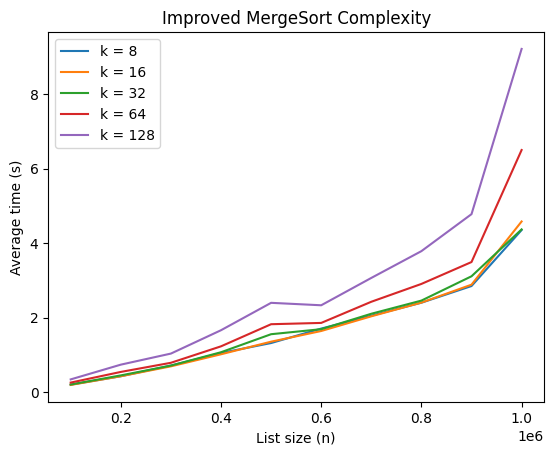

In [56]:
samples = 10
jump = 100000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [ImprovedMergeSort]
k_sizes = [8, 16, 32, 64, 128]
MachineCall(sizes, reps, algorithm, k_sizes)

### **Analysis**

The graph shows the execution time of the Improved MergeSort for different values of `k` (sublist size thresholds) as the input list size increases.

- **Small `k` values (8, 16, 32)** result in the best performance, maintaining lower execution times across all input sizes.
- **Higher `k` values (64, 128)** lead to significantly worse performance, especially for large inputs (above 500,000 elements).
- As `k` increases, the overhead of merging larger sublists becomes dominant, slowing down the algorithm considerably.
- **Optimal range:** Thresholds around **16 or 32** achieve the best balance between fast InsertionSort on small sublists and efficient merging.


## **Comparison Graph**

Graph saved to: ..\img\comparison_graph.png


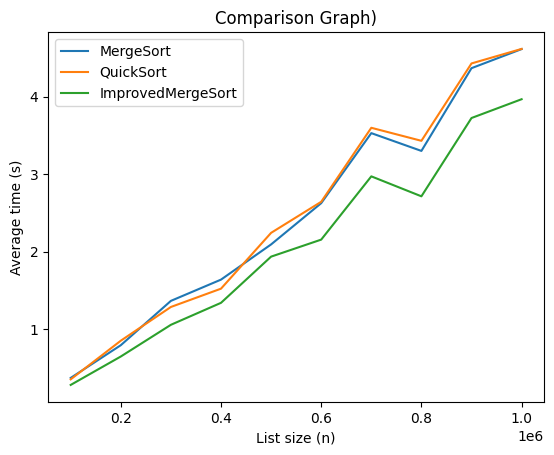

In [57]:
samples = 10
jump = 100000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [MergeSort, QuickSort, ImprovedMergeSort]
k_sizes = None
MachineCall(sizes, reps, algorithm, k_sizes)

### **Analysis**

The graph compares the execution times of MergeSort, QuickSort, and the Improved MergeSort across increasing input sizes.

- **Improved MergeSort** consistently outperforms both standard MergeSort and QuickSort across all tested input sizes.
- **QuickSort** and **MergeSort** show very similar performance, with QuickSort being slightly faster in some ranges, but the difference remains minimal.
- The advantage of **Improved MergeSort** becomes more noticeable as the list size increases, demonstrating better scalability.
- This confirms that combining InsertionSort for small sublists with MergeSort for merging is an effective optimization, especially for large datasets.

## **Conclusion**

This project explored the optimization of the classic MergeSort algorithm by introducing a hybrid approach that uses InsertionSort for small sublists.

Through experimental analysis, it was demonstrated that:
- Dividing the list into sublists of approximately 16 elements significantly improves execution time.
- The Improved MergeSort consistently outperforms both standard MergeSort and QuickSort across various input sizes.
- The optimization becomes increasingly effective as the list size grows, confirming better scalability.

These results validate the strategy of combining simple sorting algorithms for small data blocks with more complex algorithms for larger merges, achieving a balance between overhead and sorting efficiency. Future work could focus on fine-tuning the threshold dynamically based on system performance or dataset characteristics.

